In [1]:
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Embedding
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
#loading data with the unknown sample (optional) appended on the bottom as a last instance
data = pd.read_csv("C:/Users/user/OneDrive/DESKTOP/testaki_admixed2.csv")

In [3]:
data

,rs10497191,rs1079597,rs11652805,rs1229984,rs12439433,rs12498138,rs12913832,rs1426654,rs1462906,rs1572018,...,rs735480,rs7554936,rs7657799,rs7722456,rs798443,rs7997709,rs870347,rs917115,rs9522149,label
0,CT,CT,CT,TT,AA,GG,AA,GG,CC,TT,...,TT,CT,GG,TT,AA,TT,AA,CT,TT,East_Asian
1,CC,TT,TT,CT,AA,AG,AA,GG,CC,TT,...,CT,TT,GT,TT,AA,TT,CC,CC,TT,East_Asian
2,CC,CT,CT,CT,AA,GG,AA,GG,CC,TT,...,CT,TT,TT,TT,AA,CT,AC,CC,TT,East_Asian
3,CC,CC,CC,CT,AA,GG,AA,GG,CC,CT,...,TT,TT,TT,TT,AG,CT,AA,CC,TT,East_Asian
4,CC,CC,TT,CT,AA,GG,AA,GG,CC,CT,...,CT,TT,TT,TT,AG,TT,AC,CC,TT,East_Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,CC,CC,TT,CC,AA,GG,AA,AG,CC,CT,...,CT,TT,TT,CT,AA,TT,AA,CC,TT,EUR/OCE
2048,CC,CT,TT,CC,AA,GG,AG,AG,CC,CT,...,CT,CT,TT,CT,AA,TT,AA,CC,CT,EUR/OCE
2049,CC,CC,TT,CT,AA,GG,AG,AG,CC,CT,...,CT,TT,TT,CT,AA,TT,AC,CC,TT,EUR/OCE
2050,CC,CT,TT,CC,AA,GG,AG,AG,CC,TT,...,CT,CT,TT,CT,AA,TT,AA,CT,CT,EUR/OCE


In [4]:
#function that removes the unknown sample from the bottom to predict after training
def get_unknown_sample(data):
    data_nolabel=data.drop('label',axis=1)
    cols=data_nolabel.columns 
    data_nolabel_onehot_sample=pd.get_dummies(data_nolabel, columns=cols)
    sample = data_nolabel_onehot_sample.iloc[-1,:]
    sample = pd.DataFrame(sample)
    new_sample=sample.T
    new_sample=new_sample.reset_index(drop=True)
    return new_sample

In [5]:
new_sample=get_unknown_sample(data)

In [6]:
new_sample

,rs10497191_CC,rs10497191_CT,rs10497191_TT,rs1079597_CC,rs1079597_CT,rs1079597_TT,rs11652805_CC,rs11652805_CT,rs11652805_TT,rs1229984_CC,...,rs7997709_TT,rs870347_AA,rs870347_AC,rs870347_CC,rs917115_CC,rs917115_CT,rs917115_TT,rs9522149_CC,rs9522149_CT,rs9522149_TT
0,1,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,1,0,0,1,0


In [7]:
#removing the label column before training
def get_data_nolabel(data):
    data2 = data.drop(data.tail(1).index, axis=0)
    data3=data2.drop(('label'), axis=1)
    x=data3.columns
    new_data=pd.get_dummies(data3, columns=x)
    return new_data

In [8]:
new_data=get_data_nolabel(data)

In [9]:
#All columns except for the label column
X=new_data.iloc[:,:]
X

,rs10497191_CC,rs10497191_CT,rs10497191_TT,rs1079597_CC,rs1079597_CT,rs1079597_TT,rs11652805_CC,rs11652805_CT,rs11652805_TT,rs1229984_CC,...,rs7997709_TT,rs870347_AA,rs870347_AC,rs870347_CC,rs917115_CC,rs917115_CT,rs917115_TT,rs9522149_CC,rs9522149_CT,rs9522149_TT
0,0,1,0,0,1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
1,1,0,0,0,0,1,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
2,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
3,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,1,0,0,1,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1,0,0,1,0,0,0,0,1,1,...,1,1,0,0,0,1,0,0,0,1
2047,1,0,0,1,0,0,0,0,1,1,...,1,1,0,0,1,0,0,0,0,1
2048,1,0,0,0,1,0,0,0,1,1,...,1,1,0,0,1,0,0,0,1,0
2049,1,0,0,1,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1


In [10]:
Y=data.iloc[:,-1]
Y = Y.drop(data.tail(1).index, axis=0)
Y

0       East_Asian
1       East_Asian
2       East_Asian
3       East_Asian
4       East_Asian
           ...    
2046       EUR/OCE
2047       EUR/OCE
2048       EUR/OCE
2049       EUR/OCE
2050       EUR/OCE
Name: label, Length: 2051, dtype: object

In [11]:
#converting the label into a numerical output
k=0
for i in Y:
    if i == 'South_Asian':
        Y[k]=0
        k=k+1
    elif i == 'European':
        Y[k]=1
        k=k+1
    elif i == 'EUR/SAS':
        Y[k]=2
        k=k+1
    elif i == 'East_Asian':
        Y[k]=3
        k=k+1
    elif i == 'EUR/EAS':
        Y[k]=4
        k=k+1
    elif i == 'Native_American':
        Y[k]=5
        k=k+1
    elif i == 'EUR/NAM':
        Y[k]=6
        k=k+1
    elif i == 'Oceanian':
        Y[k]=7
        k=k+1
    elif i == 'EUR/OCE':
        Y[k]=8
        k=k+1
    elif i == 'Sub_Saharan_African':
        Y[k]=9
        k=k+1
    else:
        Y[k]=10
        k=k+1
Yx = np.array(Y)
Yx=Yx.astype('int')

In [12]:
#defining the splits in the inner and the outer loop of the nested cross validation scheme
from sklearn.model_selection import GridSearchCV,KFold,cross_val_predict,cross_val_score,StratifiedKFold
outer_kf = StratifiedKFold(n_splits=5,shuffle=True)
inner_kf = StratifiedKFold(n_splits=3,shuffle=True)

In [13]:
#search space for the hyperparameters
epochs = [5,7,8]
batch_size=[2,3,5]
neurons=[30,40,50,60]
neurons2=[20,30,40]
activation=['relu', 'tanh', 'sigmoid','softplus','softmax'] 
param=dict(epochs=epochs, batch_size=batch_size, neurons=neurons, neurons2=neurons2, activation=activation)

In [14]:
from sklearn.metrics import classification_report,accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.layers import Dropout
import sklearn.metrics as skm
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
from itertools import cycle

outer_loop_accuracy_scores = []
inner_loop_won_params_fs = []
inner_loop_won_params = []
inner_loop_accuracy_scores = []
best_param = []
xtrain,ytrain,xtest,ytest=[],[],[],[]
k=1

# Looping through the outer loop, feeding each training set into a GSCV as the inner loop

for train_index,test_index in outer_kf.split(X,Yx):
    
    
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = Yx[train_index], Yx[test_index]
    xtrain.append(x_train_fold)
    ytrain.append(y_train_fold)
    xtest.append(x_test_fold)
    ytest.append(y_test_fold)

    
    def create_model(init_mode='uniform',neurons=neurons, neurons2=neurons2, activation=activation):
        model = Sequential()
        model.add(Dense(neurons, kernel_initializer=init_mode, activation=activation, input_dim=163)) 
        model.add(Dense(neurons2, kernel_initializer=init_mode, activation=activation))
        model.add(Dense(11, kernel_initializer=init_mode, activation='softmax'))
        model.compile(
        optimizer='Adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])
        return model
    
 
    model = KerasClassifier(model=create_model, neurons=30, neurons2=20, activation='relu', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),verbose=1)
    

    GSCV = GridSearchCV(estimator=model, param_grid=param, cv=inner_kf,n_jobs=-1)
    

    # GSCV is looping through the training data to find the best parameters. This is the inner loop
    GSCV.fit(x_train_fold,y_train_fold)
    print(GSCV.best_params_)

    
    # The best hyper parameters from GSCV is now being tested on the unseen outer loop test data.
    pred = GSCV.predict(x_test_fold)
    pred2=GSCV.predict_proba(x_test_fold)
    
    # Appending the "winning" hyper parameters and their associated accuracy score
    inner_loop_won_params.append(GSCV.best_estimator_.get_params())

    outer_loop_accuracy_scores.append(accuracy_score(y_test_fold,pred))
    #print(skm.classification_report(y_test_fold,pred))
    inner_loop_accuracy_scores.append(GSCV.best_score_)
    
    

for i in zip(outer_loop_accuracy_scores,inner_loop_accuracy_scores, inner_loop_won_params):
    print(i)

print('Mean of outer loop accuracy score:',np.mean(outer_loop_accuracy_scores))    
    

Epoch 1/8
820/820 [==============================] - 3s 1ms/step - loss: 0.5787 - accuracy: 0.8421
Epoch 2/8
820/820 [==============================] - 1s 1ms/step - loss: 0.1137 - accuracy: 0.9732
Epoch 3/8
820/820 [==============================] - 1s 2ms/step - loss: 0.0501 - accuracy: 0.9927
Epoch 4/8
820/820 [==============================] - 1s 2ms/step - loss: 0.0259 - accuracy: 0.9970
Epoch 5/8
820/820 [==============================] - 1s 1ms/step - loss: 0.0196 - accuracy: 0.9963
Epoch 6/8
820/820 [==============================] - 1s 1ms/step - loss: 0.0139 - accuracy: 0.9988
Epoch 7/8
820/820 [==============================] - 1s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 8/8
820/820 [==============================] - 1s 1ms/step - loss: 0.0024 - accuracy: 1.0000
{'activation': 'tanh', 'batch_size': 2, 'epochs': 8, 'neurons': 50, 'neurons2': 40}
206/206 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0  

(0.9878345498783455, 0.9884146341463415, {'model': <function create_model at 0x00000218FC193CA8>, 'build_fn': None, 'warm_start': False, 'random_state': None, 'optimizer': 'rmsprop', 'loss': <keras.losses.CategoricalCrossentropy object at 0x00000218FC313408>, 'metrics': None, 'batch_size': 2, 'validation_batch_size': None, 'verbose': 1, 'callbacks': None, 'validation_split': 0.0, 'shuffle': True, 'run_eagerly': False, 'epochs': 8, 'neurons': 50, 'neurons2': 40, 'activation': 'tanh', 'class_weight': None})
(0.9829268292682927, 0.989643047890333, {'model': <function create_model at 0x00000218FC135DC8>, 'build_fn': None, 'warm_start': False, 'random_state': None, 'optimizer': 'rmsprop', 'loss': <keras.losses.CategoricalCrossentropy object at 0x00000218FCA0CA08>, 'metrics': None, 'batch_size': 2, 'validation_batch_size': None, 'verbose': 1, 'callbacks': None, 'validation_split': 0.0, 'shuffle': True, 'run_eagerly': False, 'epochs': 8, 'neurons': 50, 'neurons2': 30, 'activation': 'tanh', 'c

In [15]:
#create a new NN object for final predicitons selecting a "concensus" model from the above
def create_model(init_mode='uniform'):
    model = Sequential()
    model.add(Dense(50, kernel_initializer=init_mode, activation='tanh', input_dim=163)) 
    model.add(Dense(30, kernel_initializer=init_mode, activation='tanh'))
    model.add(Dense(11, kernel_initializer=init_mode, activation='softmax'))
    model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    return model

In [18]:
model_final = KerasClassifier(model=create_model, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),verbose=1)

In [19]:
model_final.fit(xtrain[1],ytrain[1],epochs=8,batch_size=2)

Epoch 1/8
821/821 [==============================] - 2s 1ms/step - loss: 0.6388 - accuracy: 0.8403
Epoch 2/8
821/821 [==============================] - 1s 1ms/step - loss: 0.1464 - accuracy: 0.9653
Epoch 3/8
821/821 [==============================] - 1s 1ms/step - loss: 0.0660 - accuracy: 0.9921
Epoch 4/8
821/821 [==============================] - 1s 1ms/step - loss: 0.0398 - accuracy: 0.9945
Epoch 5/8
821/821 [==============================] - 1s 1ms/step - loss: 0.0183 - accuracy: 0.9994
Epoch 6/8
821/821 [==============================] - 1s 1ms/step - loss: 0.0160 - accuracy: 0.9963
Epoch 7/8
821/821 [==============================] - 1s 1ms/step - loss: 0.0133 - accuracy: 0.9963
Epoch 8/8
821/821 [==============================] - 1s 1ms/step - loss: 0.0109 - accuracy: 0.9963


KerasClassifier(
	model=<function create_model at 0x00000218FCCC5318>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=<keras.losses.CategoricalCrossentropy object at 0x00000218FC209848>
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [20]:
a=model_final.predict(xtest[1])

13/13 [==============================] - 0s 710us/step


In [21]:
print(skm.classification_report(ytest[1],a))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        68
           1       0.99      0.99      0.99       100
           2       1.00      0.60      0.75        10
           3       1.00      1.00      1.00        99
           4       0.88      0.88      0.88         8
           5       1.00      1.00      1.00         7
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00       100
          10       0.91      1.00      0.95        10

    accuracy                           0.98       410
   macro avg       0.97      0.92      0.94       410
weighted avg       0.98      0.98      0.98       410



13/13 [==============================] - 0s 1ms/step


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2340x1800 with 0 Axes>

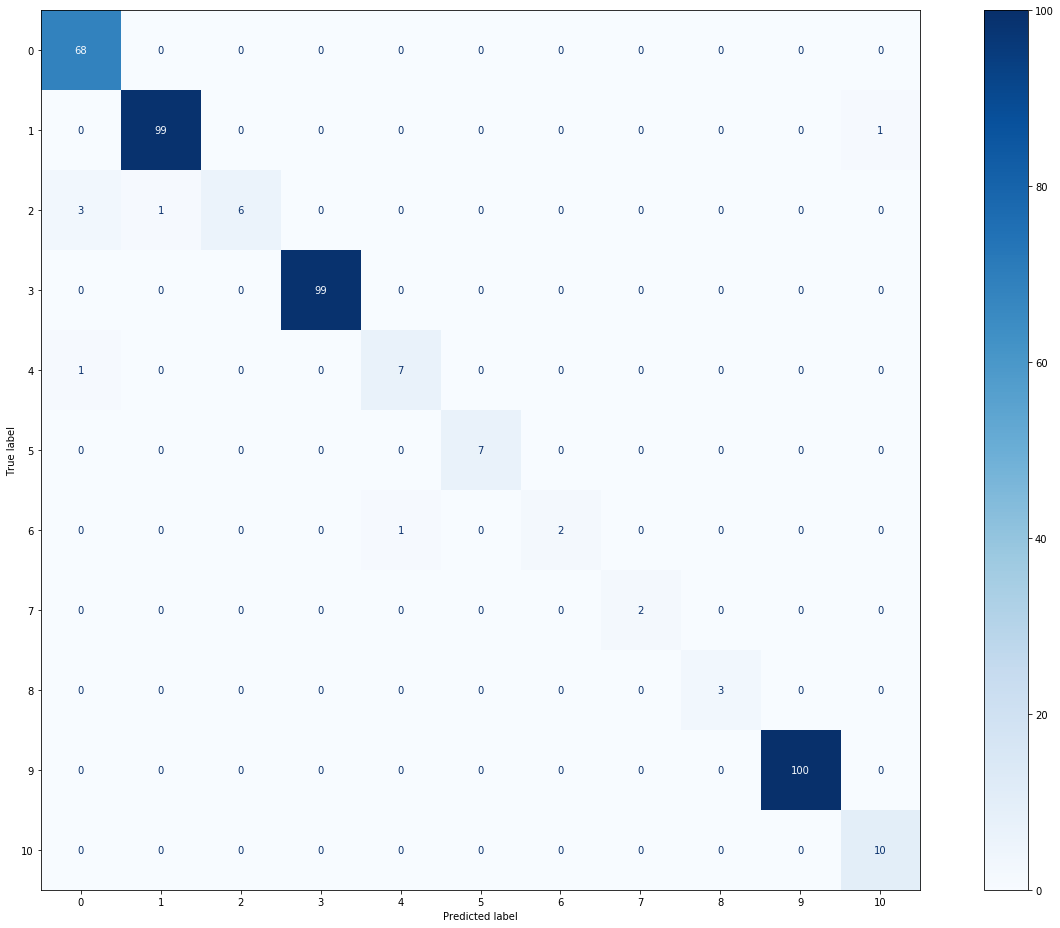

<Figure size 2340x1800 with 0 Axes>

In [22]:
#confusion matrix 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(18, 13))
plot_confusion_matrix(model_final, xtest[1], ytest[1], cmap=plt.cm.Blues, ax=ax, values_format='d')

plt.tight_layout()
plt.savefig('conf_NN.jpg')

figure(figsize=(13, 10), dpi=180)

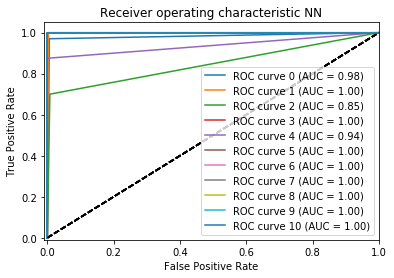

In [60]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
class_list = [0,1,2,3,4,5,6,7,8,9,10]
y = label_binarize(ytest[0], classes=class_list)
bin_pred = label_binarize(a, classes= class_list)
n_classes = 11

    # Compute ROC curve and ROC area for each class (Onevs.Rest scheme)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], bin_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
for i in range(n_classes):
        #plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve %s (AUC = %0.2f)' % (class_list[i],roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic NN')
plt.legend(loc="lower right")
plt.savefig('rocnn.jpg')
plt.show()
k=k+1